In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.cosmology import Planck18
import fitsio

In [2]:
k = Table.read('/pscratch/sd/z/zhaozhon/DATASET/DESI-data/k.csv',format='csv')
indice = np.isnan(k['k_gg']) | np.isinf(k['k_gg']) | np.isnan(k['k_rr']) | np.isinf(k['k_rr'])
k_gg = k['k_gg'][~indice]
k_rr = k['k_rr'][~indice]

In [3]:
file = '/pscratch/sd/z/zhaozhon/DATASET/DESI-data/new_d.fits'
d = Table(fitsio.read(file))
SEL = np.where((d['Z'] > 2.1) & (d['Z'] < 2.8))[0]
apr_mag_g = d['APP_MAG_G'][SEL][~indice]
apr_mag_g_err = d['APP_MAGERR_G'][SEL][~indice]
apr_mag_r = d['APP_MAG_R'][SEL][~indice]
apr_mag_r_err = d['APP_MAGERR_R'][SEL][~indice]
z = d['Z'][SEL][~indice]

In [4]:
d = Planck18.distmod(z).value

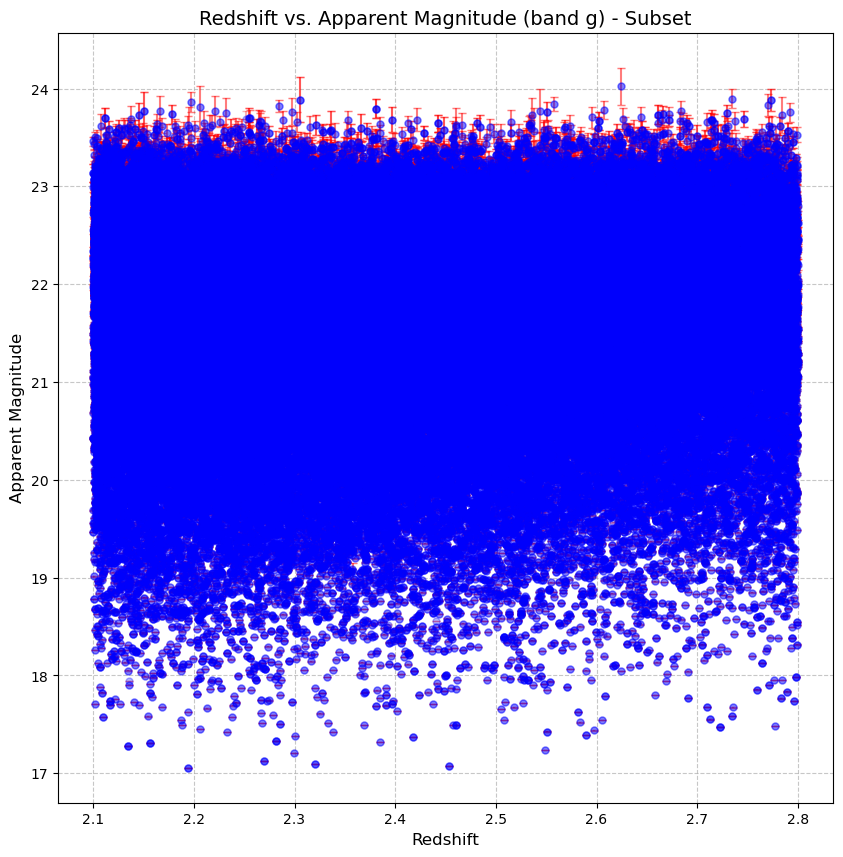

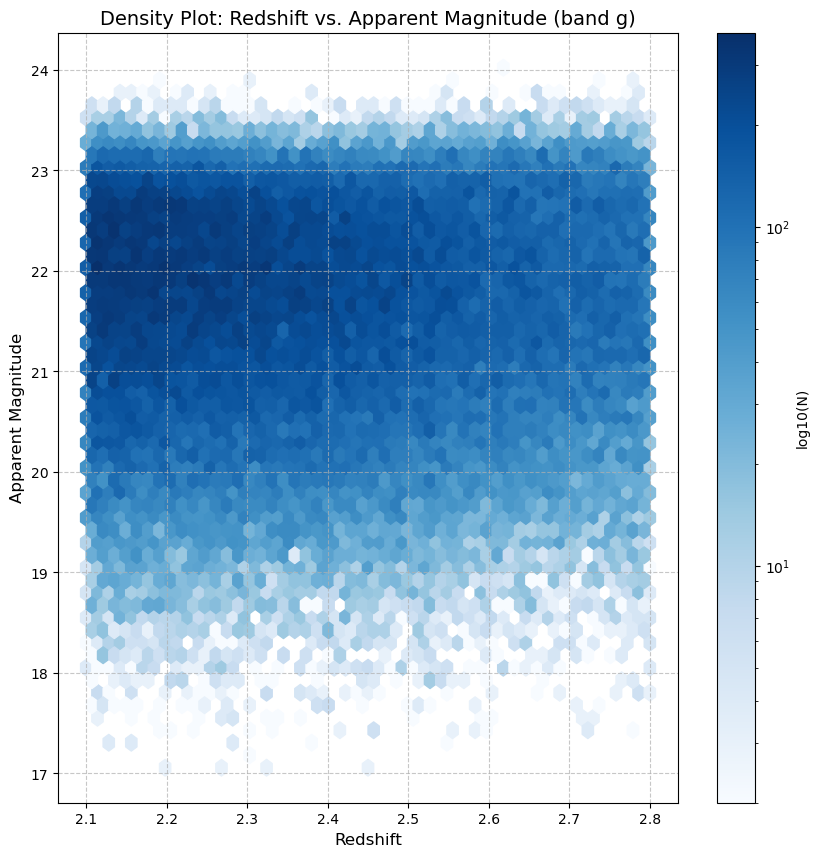

In [5]:
plt.figure(figsize=(10, 10))
plt.errorbar(z, apr_mag_g, yerr=apr_mag_g_err, fmt='o', color='blue', ecolor='red', capsize=3, markersize=5, alpha=0.3)
plt.title('Redshift vs. Apparent Magnitude (band g) - Subset', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Apparent Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
#plt.savefig('/global/u1/z/zhaozhon/Plot/apr_mag', dpi=300)  # Saving the errorbar plot

# Creating and saving the hexbin plot
plt.figure(figsize=(10, 10))
plt.hexbin(z, apr_mag_g, gridsize=50, cmap='Blues', bins='log')
plt.colorbar(label='log10(N)')
plt.title('Density Plot: Redshift vs. Apparent Magnitude (band g)', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Apparent Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
#plt.savefig('/global/u1/z/zhaozhon/Plot/apr_mag_density', dpi=300)  # Saving the hexbin plot

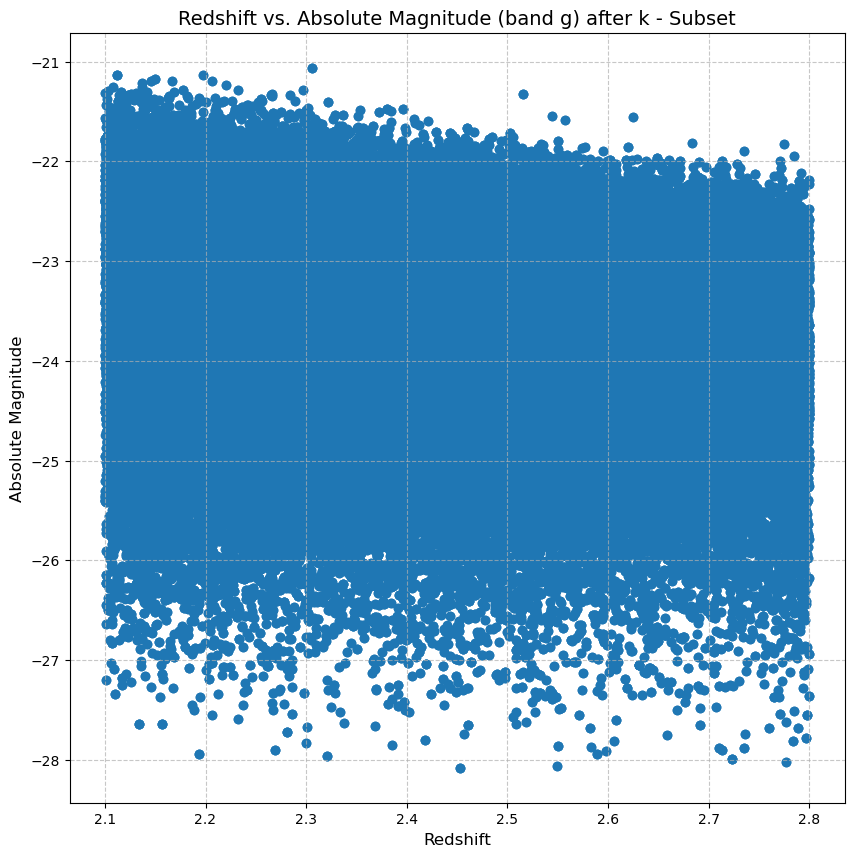

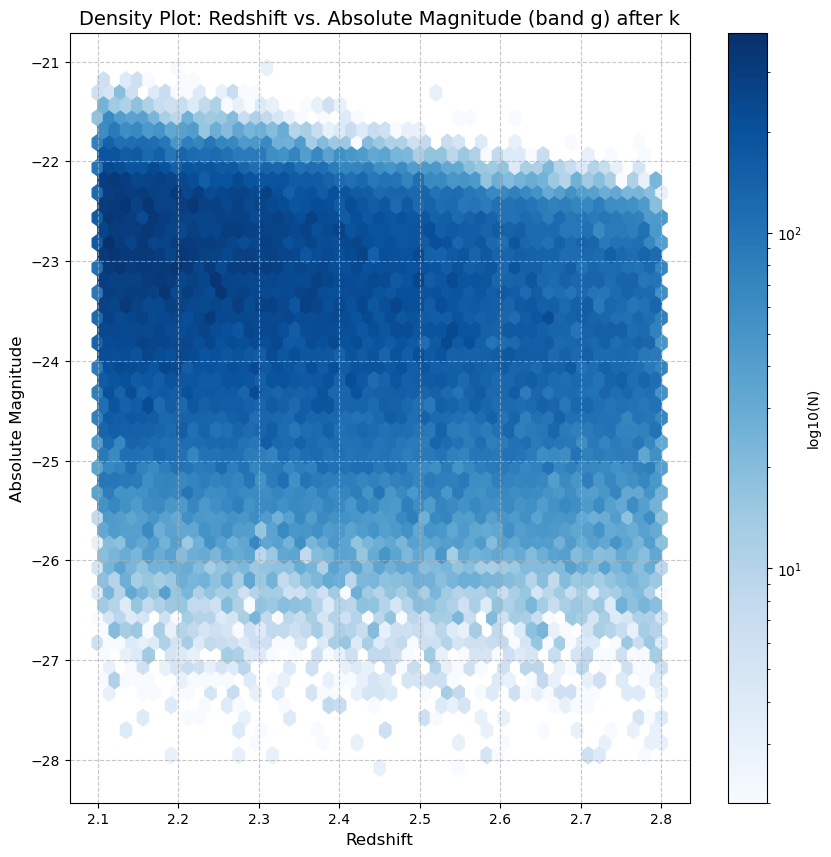

In [6]:
plt.figure(figsize=(10, 10))
plt.scatter(z, apr_mag_g-d-k_gg)
plt.title('Redshift vs. Absolute Magnitude (band g) after k - Subset', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Absolute Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
#plt.savefig('/global/u1/z/zhaozhon/Plot/after_k_g', dpi=300)  # Saving the errorbar plot

# Creating and saving the hexbin plot
plt.figure(figsize=(10, 10))
plt.hexbin(z, apr_mag_g-d-k_gg, gridsize=50, cmap='Blues', bins='log')
plt.colorbar(label='log10(N)')
plt.title('Density Plot: Redshift vs. Absolute Magnitude (band g) after k', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Absolute Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
#plt.savefig('/global/u1/z/zhaozhon/Plot/after_k_density_g', dpi=300)  # Saving the hexbin plot


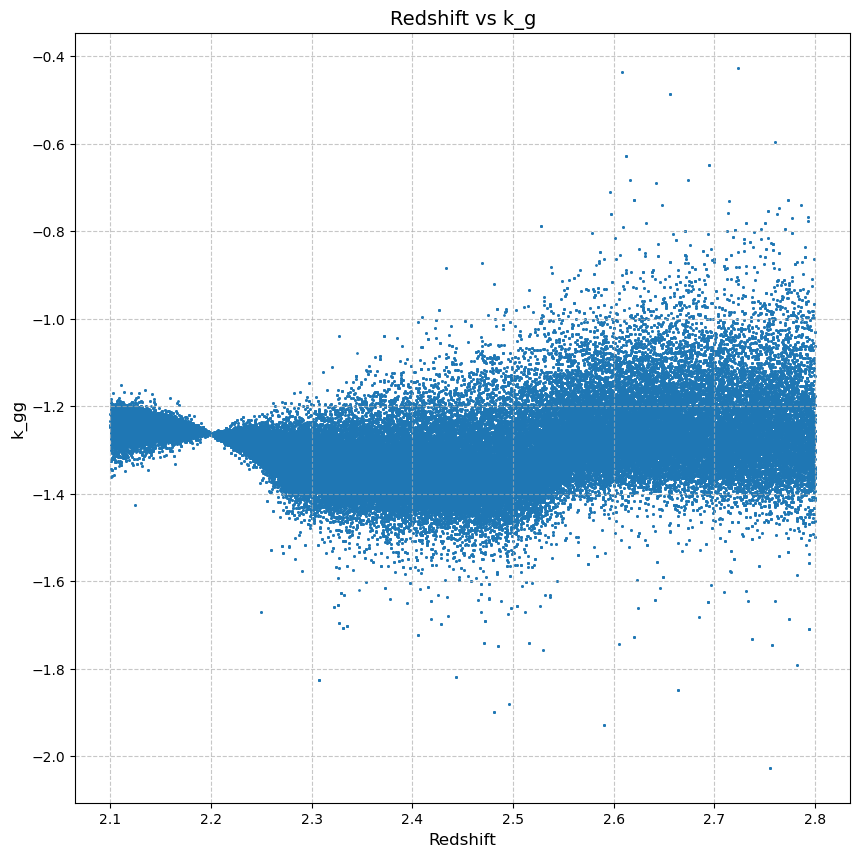

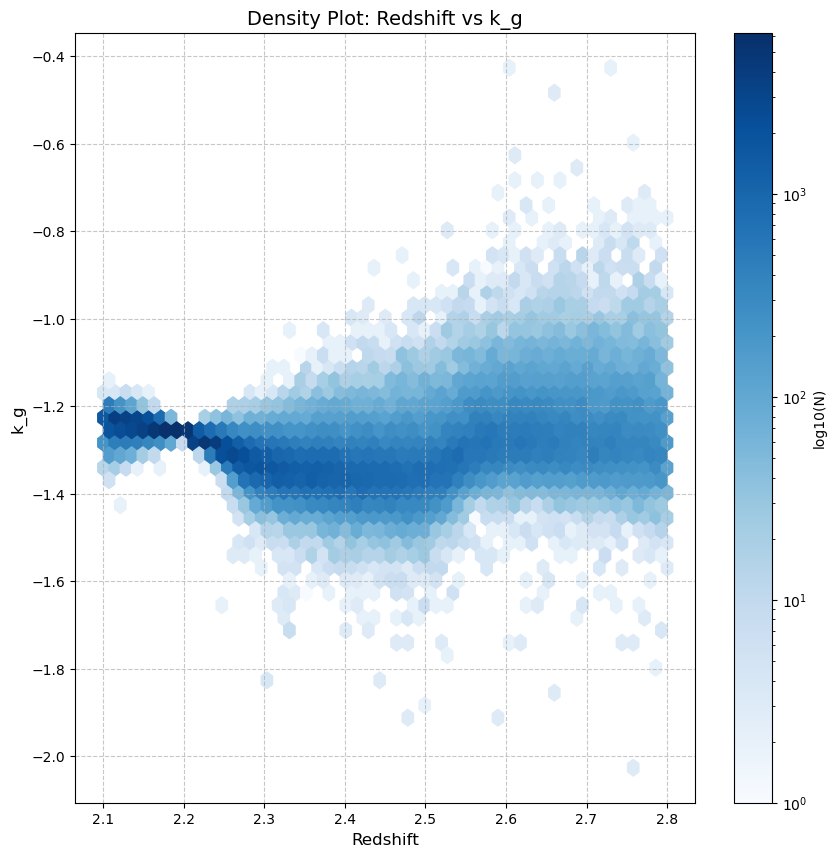

In [7]:
plt.figure(figsize=(10, 10))
plt.scatter(z, k_gg,s=1)
plt.title('Redshift vs k_g', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('k_gg', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
#plt.savefig('/global/u1/z/zhaozhon/Plot/k_g1', dpi=300)  # Saving the errorbar plot

# Creating and saving the hexbin plot
plt.figure(figsize=(10, 10))
plt.hexbin(z, k_gg, gridsize=50, cmap='Blues', bins='log')
plt.colorbar(label='log10(N)')
plt.title('Density Plot: Redshift vs k_g', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('k_g', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
#plt.savefig('/global/u1/z/zhaozhon/Plot/k_g2', dpi=300)  # Saving the hexbin plot

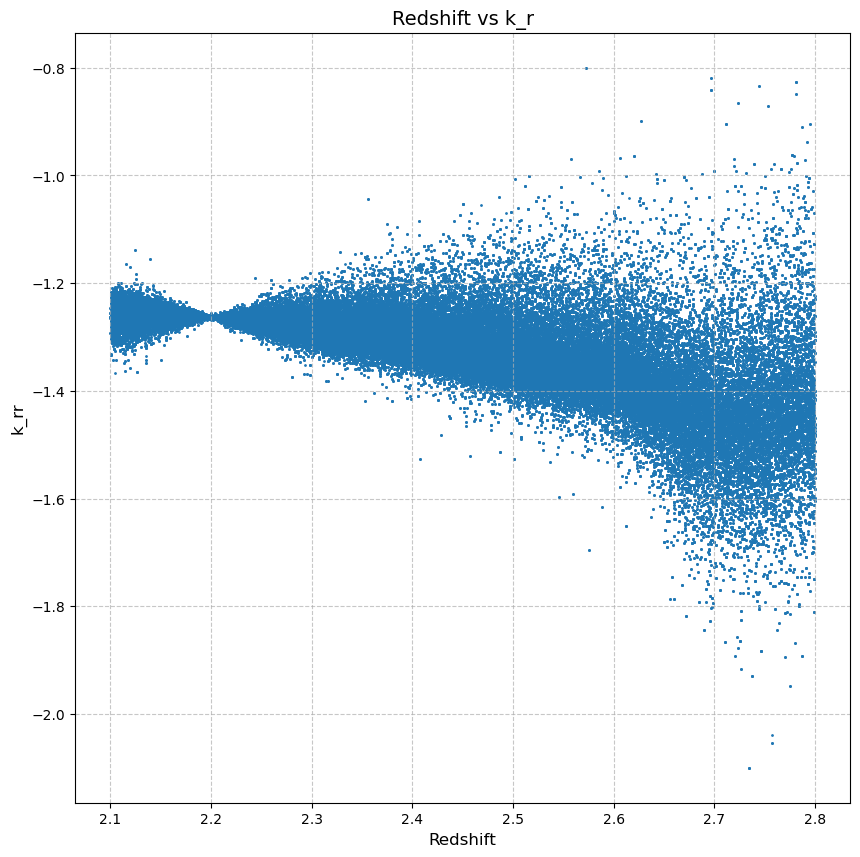

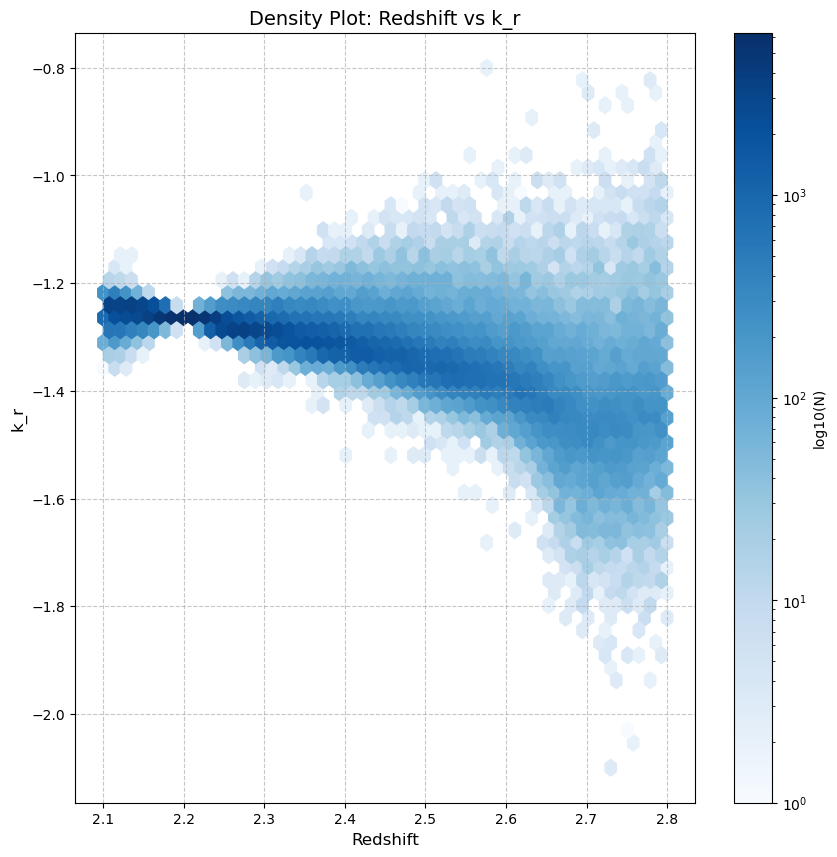

In [8]:
plt.figure(figsize=(10, 10))
plt.scatter(z, k_rr,s=1)
plt.title('Redshift vs k_r', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('k_rr', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
#plt.savefig('/global/u1/z/zhaozhon/Plot/k_g1', dpi=300)  # Saving the errorbar plot

# Creating and saving the hexbin plot
plt.figure(figsize=(10, 10))
plt.hexbin(z, k_rr, gridsize=50, cmap='Blues', bins='log')
plt.colorbar(label='log10(N)')
plt.title('Density Plot: Redshift vs k_r', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('k_r', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
#plt.savefig('/global/u1/z/zhaozhon/Plot/k_g2', dpi=300)  # Saving the hexbin plot